## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1] (используйте для этого функцию `np.random.rand()`). Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


0.0038689000000431406


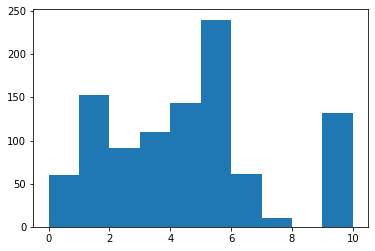

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from scipy import stats
import math

import time
import random

a = np.array ([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.24])
a /= np.sum(a)
a = np.array ([np.sum(a[:k]) for k in range(1, 11)])
f = np.empty(1000, dtype=np.int8)

t = tm.perf_counter()
for i in range(1000):
    el = np.random.rand()
    j = 0
    while (a[j] < el):
        j += 1
    f[i] = j

time_1 = tm.perf_counter() - t
print(time_1)

plt.hist(f, range = (0,10)) 
plt.show()

0.0028566000000864733


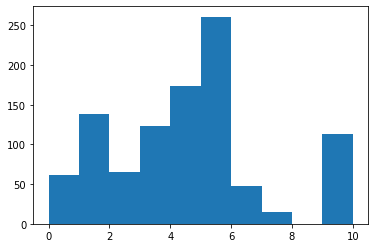

In [13]:
a = np.array ([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.24])
ind = np.argsort (a)[::-1]
a = np.sort (a)[::-1]
a /= np.sum(a)
a = np.array ([np.sum(a[:k]) for k in range(1, 11)])
f = np.empty(1000, dtype=np.int8)

t = tm.perf_counter()
for i in range(1000):
    el = np.random.rand()
    j = 0
    while (a[j] < el):
        j += 1
    f[i] = j

time_2 = tm.perf_counter() - t
print(time_2)

plt.hist(ind[f], range = (0,10))
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

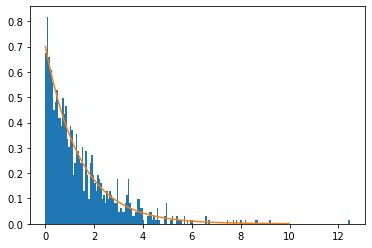

In [20]:
l = 0.7
rand = -np.log(1-np.random.random(1000))/l
data = np.arange(1000)/100
plt.hist(rand,bins=200, density=True)
plt.plot(data,l*np.exp(-l*data))
plt.show()

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

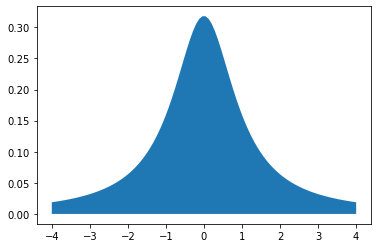

In [21]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

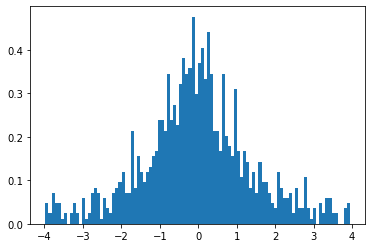

In [34]:
import math
x = []
for i in range (10000):
    d=random.uniform(-4,4) 
    if(random.random() < 1/(math.pi*(1 + d*d))): 
        x.append(d)
plt.hist(x,bins=100, density = True)
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

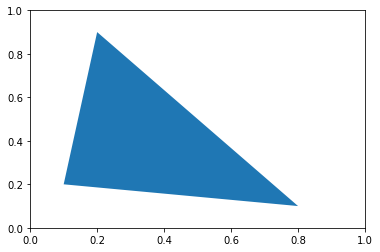

In [ ]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

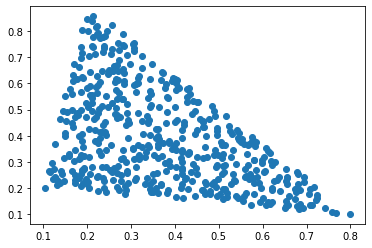

In [40]:
trngl = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)

rand = np.random.rand(500)
x = np.array([(1 - math.sqrt(1 - rand[i])) for i in range(500)]) 
y = np.random.rand(500) * (1 - x) 
xx = 0.1 + 0.7 * x + 0.1 * y 
yy = 0.2 - 0.1 * x + 0.7 * y 
plt.scatter(xx, yy)

plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

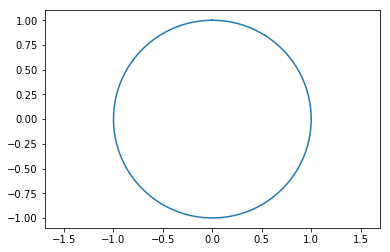

In [ ]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

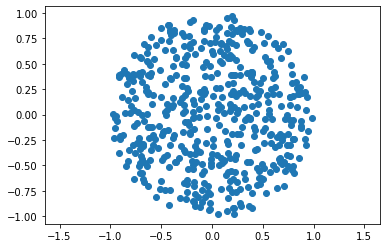

In [48]:
plt.axis('equal')
r=np.sqrt(np.random.rand (500))
phi=2*math.pi*np.random.rand (500)
plt.scatter(r*np.cos(phi), r*np.sin(phi))

plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

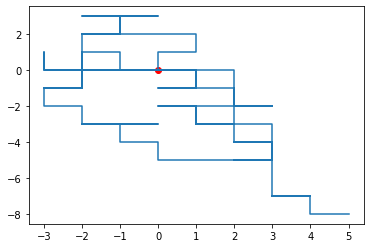

In [58]:
n=100

rand = np.random.rand(100)*5

walk = np.zeros((n, 2))

for i in range(1,n):
    if rand[i] > 3:
        walk[i, :] = walk[i-1,:] + np.array([1, 0])
    if rand[i] > 2 and rand[i] <= 3:
        walk[i, :] = walk[i-1,:] + np.array([0, 1])
    if rand[i] > 1 and rand[i] <= 2:
        walk[i, :] = walk[i-1,:] + np.array([-1, 0])
    if rand[i] <= 1:
        walk[i, :] = walk[i-1,:] + np.array([0, -1])

plt.plot(walk[:,0],  walk[:,1])
plt.scatter(0,0, color = 'red')
plt.show()